<a href="https://colab.research.google.com/github/CorinnnaZ/CompPhysChallenge/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3

- Add slider function: https://www.youtube.com/watch?v=jWT-HXv0LUQ
- Have some way in the output of the code to show that this x_value is the same as L/2, even when the slider functions changes these points -- indicating its truth.
---------------

Once added this, I can move onto task 4

**Remove all writing once completed**

In [72]:
# modules

%pip install sympy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import fsolve, minimize_scalar

In [73]:
x, y, c, n, L = sym.symbols('x y c n L', real=True)
f = (sym.sqrt(x**2 + y**2))/(c/n) + (sym.sqrt((L-x)**2+y**2))/(c/n)
dfdx = sym.diff(f,x) # derivative


print(f"f(x) = {f}\nf'(x) = {dfdx}")

f_x = sym.lambdify((x, y, c, n, L), f)
df_dx = sym.lambdify((x, y, c, n, L), dfdx)

f(x) = n*sqrt(x**2 + y**2)/c + n*sqrt(y**2 + (L - x)**2)/c
f'(x) = n*x/(c*sqrt(x**2 + y**2)) + n*(-L + x)/(c*sqrt(y**2 + (L - x)**2))


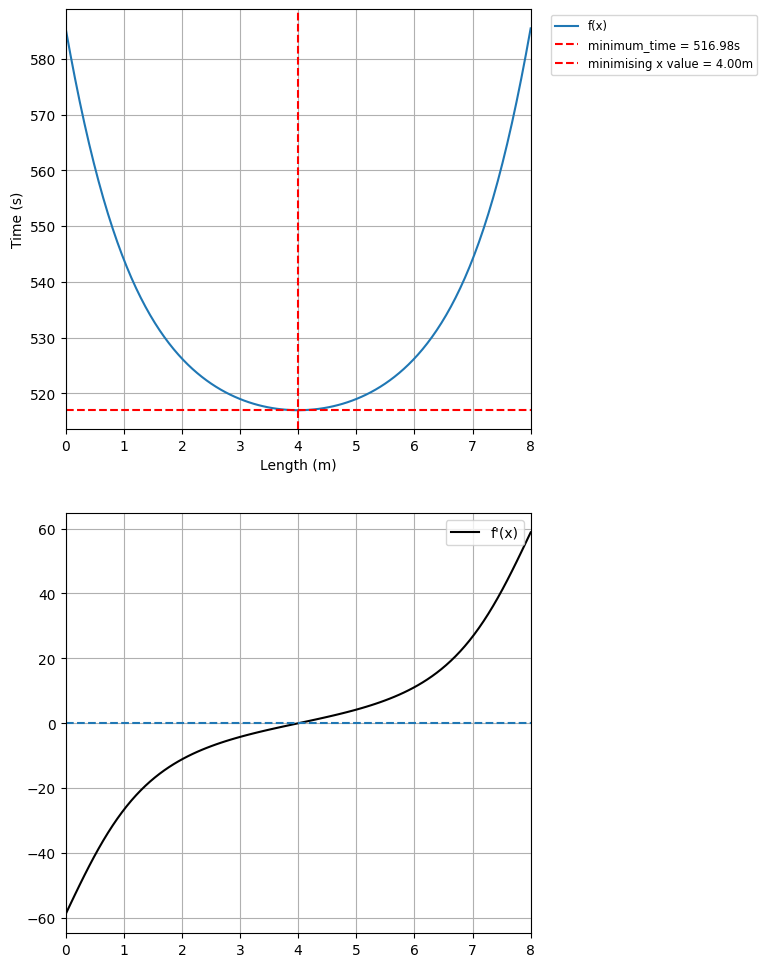

In [133]:
# constants
L_val = 8
c_val = 0.05
n_val = 3 # refractive index
y_val = 1.6 # some constant

# x
x = np.linspace(0, L_val, 100) # length 0 to length L

# time function
def t(x):
    return f_x(x, y_val, c_val, n_val, L_val)

# derivative function
def dtdx(x):
    return df_dx(x, y_val, c_val, n_val, L_val)

# optimal path
result = minimize_scalar(time_function, bounds=(0, L_val), method="bounded")
optimal_x = result.x
min_time = result.fun # reading the function from it

# plotting
fig, (ax, ax2) = plt.subplots(2, figsize=(6,12))
ax.plot(x, t(x), label="f(x)")

ax.axhline(y=min_time,color='r', linestyle="--", label=f"minimum_time = {min_time:.2f}s")
ax.axvline(x=optimal_x, color='r', linestyle='--', label=f"minimising x value = {optimal_x:.2f}m")

ax.set_xlabel("Length (m)")
ax.set_ylabel("Time (s)")
ax.set_xlim(0,L_val)
ax.legend(fancybox=True, bbox_to_anchor=(1.5, 1), loc = 'upper right', fontsize='small')
ax.grid()

ax2.plot(x, dtdx(x), color='k', label="f'(x)")
ax2.axhline(y=0, linestyle='--')
ax2.set_xlim(0,L_val)
ax2.grid()
ax2.legend()


plt.show()